In [33]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
plt.style.use('ggplot')

# Data extraction and exploration

In [34]:
cardio = pd.read_csv('/Users/surajkwork/Documents/Projects/runkeeper_data_analysis/data/cardioActivities.csv')

In [35]:
cardio.head()

,Activity Id,Date,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,2024-12-10 18:00:57,Running,NaN,2.87,36:22,12:41,4.73,186.0,21,NaN,NaN,NaN,2024-12-10-180057.gpx
1,becc4798-4db0-4a19-bf61-c32ebd5650f2,2024-12-01 15:23:10,Running,NaN,7.97,1:16:59,9:40,6.21,559.0,41,NaN,NaN,NaN,2024-12-01-152310.gpx
2,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,2024-11-17 16:04:34,Running,NaN,3.85,38:12,9:56,6.04,285.0,15,NaN,NaN,NaN,2024-11-17-160434.gpx
3,98b4b003-9d1c-4743-bd88-b19766453fdd,2024-11-02 16:15:58,Running,NaN,7.86,1:10:45,9:00,6.67,568.0,42,NaN,NaN,NaN,2024-11-02-161558.gpx
4,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,2024-10-26 17:14:17,Running,NaN,7.95,1:07:10,8:27,7.10,580.0,41,NaN,NaN,NaN,2024-10-26-171417.gpx


In [36]:
steps = pd.read_csv('/Users/surajkwork/Documents/Projects/runkeeper_data_analysis/data/steps.csv')
steps.head()

,Activity Id,Timestamp,Steps
0,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,8.0,3
1,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,11.0,9
2,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,16.0,12
3,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,19.0,2
4,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,21.0,2


In [37]:
cardio.shape, steps.shape

((361, 14), (540280, 3))

In [38]:
cardio.nunique()

Activity Id                 361
Date                        361
Type                          3
Route Name                    0
Distance (km)               216
Duration                    329
Average Pace                157
Average Speed (km/h)        170
Calories Burned             213
Climb (m)                   117
Average Heart Rate (bpm)      0
Friend's Tagged               0
Notes                         0
GPX File                    360
dtype: int64

In [39]:
steps.nunique()

Activity Id     360
 Timestamp     5887
 Steps         9633
dtype: int64

In [40]:
columns_to_drop = ['Type', 'Route Name', 'Average Heart Rate (bpm)', "Friend's Tagged", 'Notes', 'GPX File']
cardio = cardio.drop(columns=columns_to_drop)
cardio.head()

,Activity Id,Date,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m)
0,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,2024-12-10 18:00:57,2.87,36:22,12:41,4.73,186.0,21
1,becc4798-4db0-4a19-bf61-c32ebd5650f2,2024-12-01 15:23:10,7.97,1:16:59,9:40,6.21,559.0,41
2,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,2024-11-17 16:04:34,3.85,38:12,9:56,6.04,285.0,15
3,98b4b003-9d1c-4743-bd88-b19766453fdd,2024-11-02 16:15:58,7.86,1:10:45,9:00,6.67,568.0,42
4,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,2024-10-26 17:14:17,7.95,1:07:10,8:27,7.10,580.0,41


In [42]:
cardio['Date'] = pd.to_datetime(cardio['Date'])
cardio.set_index('Date', inplace=True)

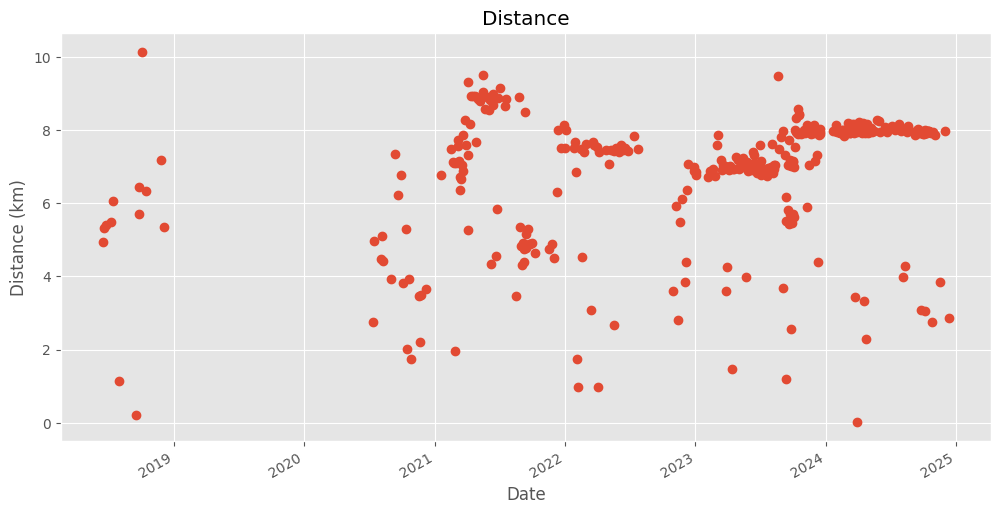

In [43]:
cardio['Distance (km)'].plot(title='Distance', figsize=(12, 6), style='o')
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.show()

In [46]:
cardio['Time'] = cardio.index.time
cardio['Time_seconds'] = cardio['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


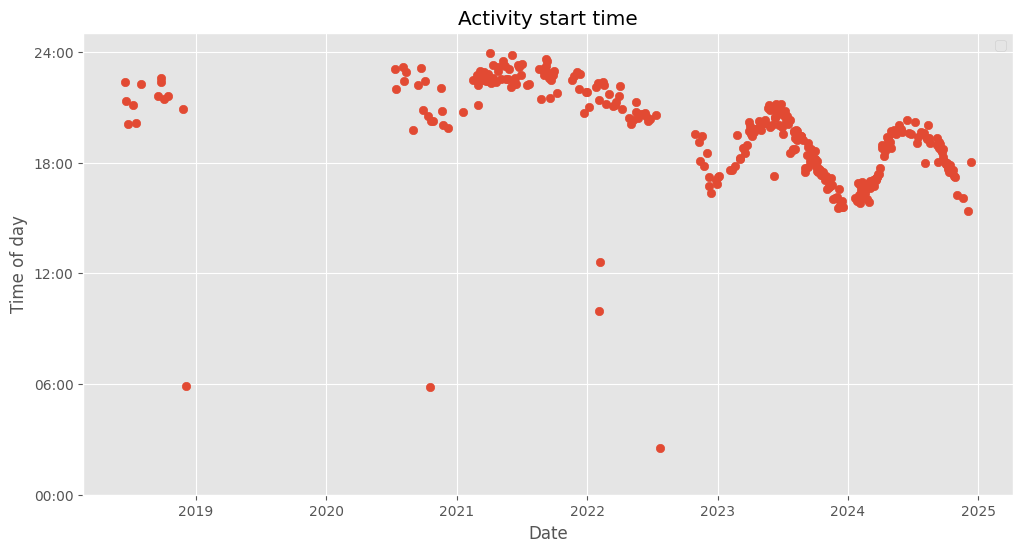

In [65]:

plt.figure(figsize=(12, 6))
plt.scatter(cardio.index, cardio['Time_seconds'])
plt.yticks(range(0, 25 * 3600, 6 * 3600), [f"{i:02}:00" for i in range(0, 25, 6)])

plt.xlabel("Date")
plt.ylabel("Time of day")
plt.title("Activity start time")
plt.legend()
plt.grid(True)
plt.show()